**Purpose:** Follow along a tutorial from statology about fitting a PLS model. This model is used to take care of multicollinearity\
**Date:** February 26, 2026

# 1. Install and load packages

In [1]:
# Install package
install.packages("pls")
library(pls)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




# 2. Fit the PLS model

In [2]:
# Data
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
# Summary of the data
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [4]:
# Structure of the data
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [5]:
# Fit model
set.seed(2026)
model <- plsr(hp ~ mpg + disp + drat + wt + qsec, data = mtcars, scale = TRUE, validation = "CV")

# 3. Choose the number of PLS components to include

In [6]:
summary(model)

Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: kernelpls
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           69.66    38.72    33.70    34.88    35.71    35.72
adjCV        69.66    38.59    33.47    34.56    35.34    35.36

TRAINING: % variance explained
    1 comps  2 comps  3 comps  4 comps  5 comps
X     68.66    89.27    95.82    97.94   100.00
hp    71.84    81.74    82.00    82.02    82.03


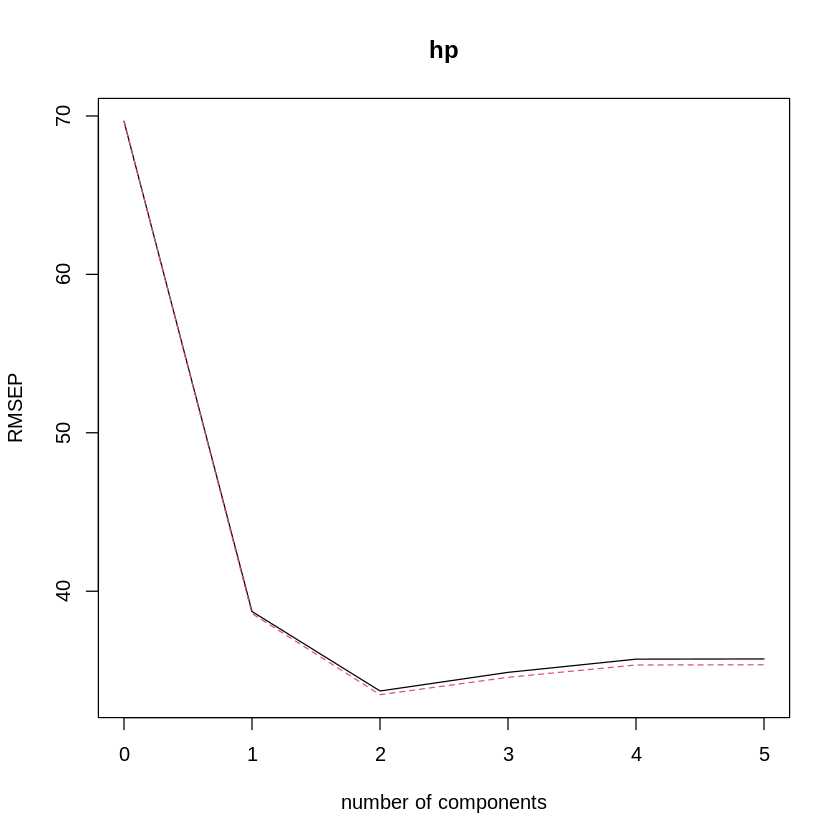

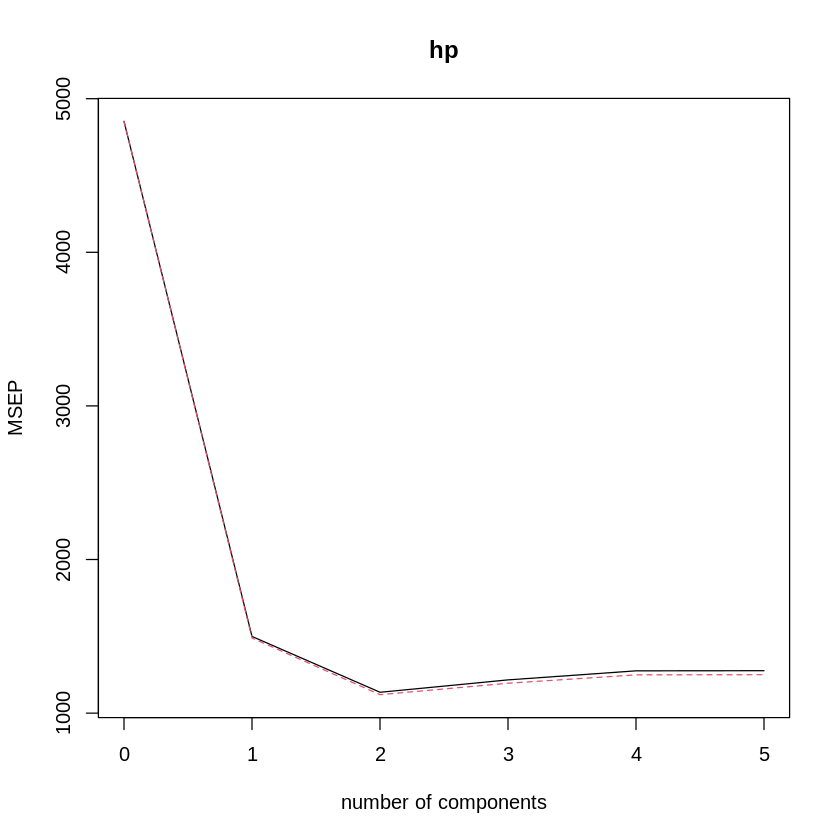

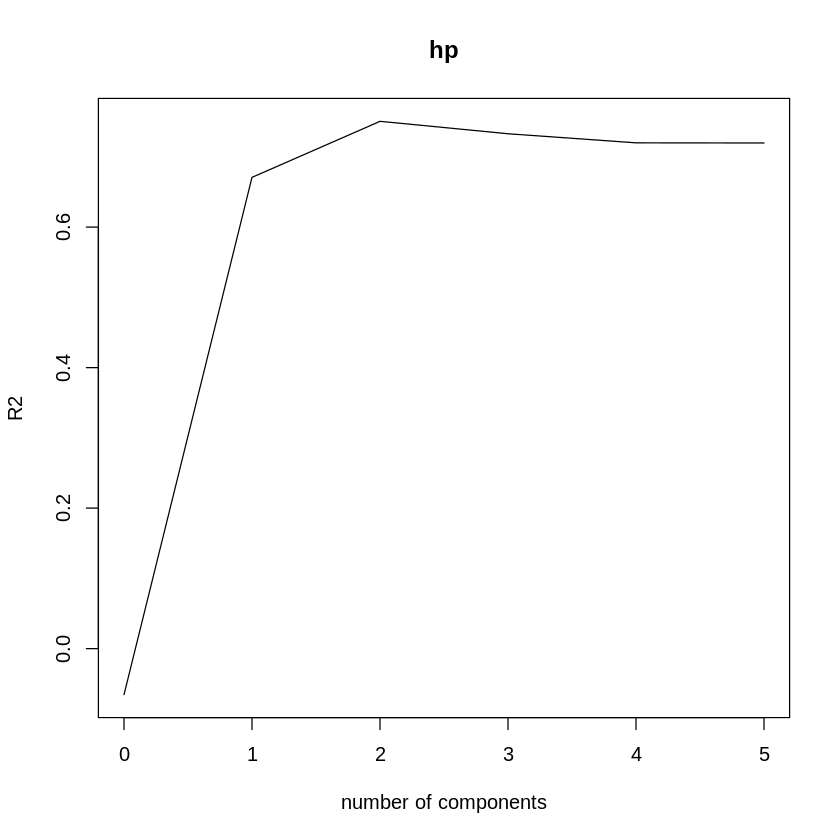

In [7]:
# Plot the values
validationplot(model)
validationplot(model, val.type = "MSEP")
validationplot(model, val.type = "R2")

ncomp = 2 will probably give the best result

# 4. Fit the final model and make predictions

In [8]:
# Create test and train datasets
train <- mtcars[1:25, c("hp", "mpg", "disp", "drat", "wt", "qsec")]
test <- mtcars[26:nrow(mtcars), c("hp", "mpg", "disp", "drat", "wt", "qsec")]
y_test <- mtcars[26:nrow(mtcars), c("hp")]

In [9]:
# Fit the model
final_model <- plsr(hp ~ mpg + disp + drat + wt + qsec, data = train, scale = TRUE, validation = "CV")
# Make predictions
pls_pred <- predict(final_model, test, ncomp = 2)
# Calculate RMSE
sqrt(mean(pls_pred - y_test)^2)

[1] 29.18117

In [10]:
sessionInfo()

R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] pls_2.9-0

loaded via a namespace (and not attached):
 [1] digest_0.6.39     IRdisplay_1.1     base64enc_0.1-3   fastmap_1.2.0    
 [5] glue_1.8.0        htmltools_0.5.9   rep